In [102]:
import star_functions as nana
import pandas as pd
import glob
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
import numpy as np
from astropy import units as u
import matplotlib.ticker as ticker
import importlib
import os
importlib.reload(nana)
%reload_ext autoreload
%autoreload 2
from datetime import datetime

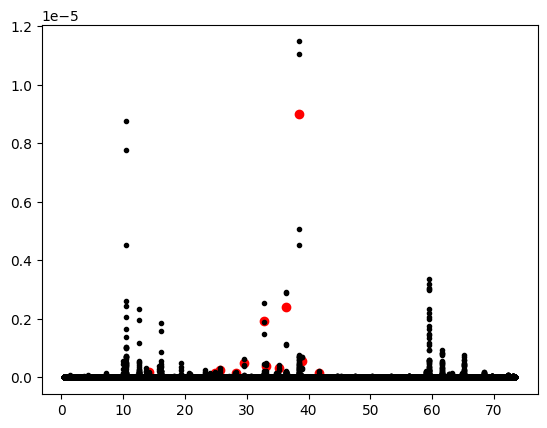

In [6]:
#og KIC 520 star star
lc, delta_f, sampling_time, exptime520 = nana.star('KIC 5202905')
# print("delta_f:", delta_f)
# print("sampling_time:", sampling_time)
#if lc is None:
    #return 
f_max = (3 / (2*sampling_time))
f_min = 0.5
df = delta_f/3
t_fit520, flux_fit520, weight_fit520 = nana.mask_vals(lc)
freq_full, power_full = nana.pg_full(f_min, f_max, df, lc)
freq_mini, power_mini = nana.pg_mini(f_min, f_max, df, lc )

indices = nana.get_filtered_peaks(12, freq_mini, power_mini)
refined_freq, refined_power, second_derivatives = nana.refine_peaks(freq_mini, power_mini, indices)
fc = nana.folding_freq(delta_f, freq_full, power_full, sampling_time, False)
regions, final_freqs520, chi2s = nana.region_and_freq(indices, fc, df, freq_mini, power_mini, t_fit520, flux_fit520, weight_fit520, exptime520)

plt.plot(freq_full, power_full, 'k.')
plt.scatter(final_freqs520, refined_power, color = 'red', marker = 'o')
plt.show()



a_early, a_late, b_early, b_late = nana.check_coherence(t_fit520, flux_fit520, weight_fit520, final_freqs520, exptime520)
rate_of_phase520, rate_of_amp = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit520)
delta_chi2s = nana.null_chi_squared(flux_fit520, weight_fit520) - chi2s
sharpnesses = nana.sharpness(second_derivatives, refined_power)

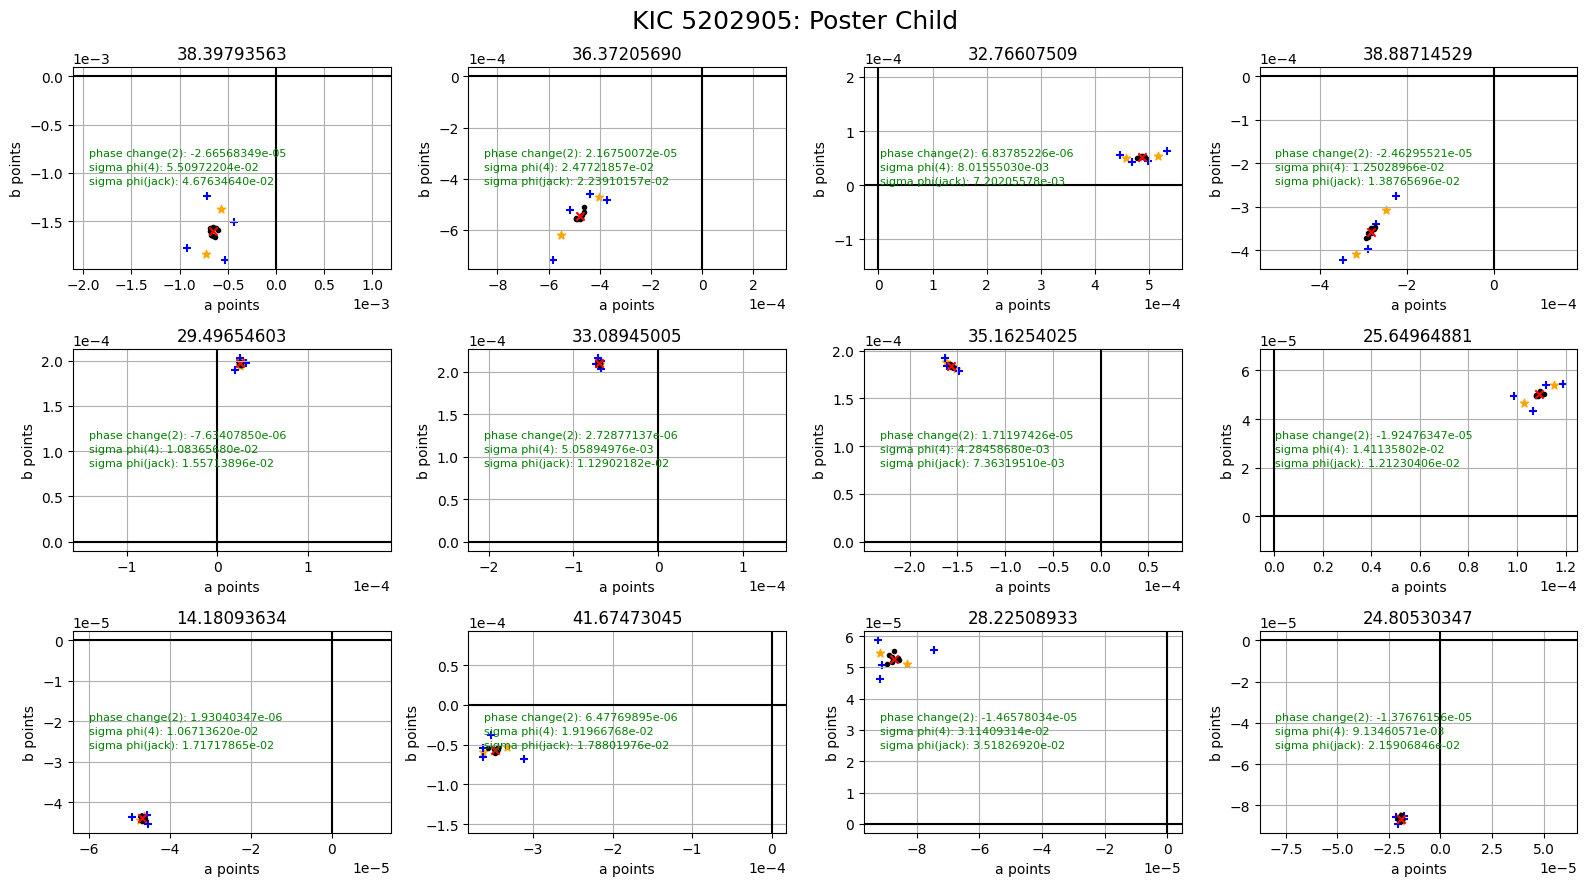

In [7]:
#520 star stats
rate_of_phase520, rate_of_amp = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit520)
all, half, quartiles, eighths = nana.coherence_all(t_fit520, flux_fit520, weight_fit520, final_freqs520, exptime520)
amp_change, phase_change, sigma_lnA, sigma_phi4, sigma_phij = nana.sampling_stats(all, quartiles, eighths)


# three phase values: rate_of_phase, phase_change, sigma_phi4, sigma_phij
fig, axes = plt.subplots(3, 4, figsize=(16, 9))

plt.suptitle("KIC 5202905: Poster Child", fontsize = 18)

for idx, (ax, points1, points2, points3, points4, p1, p2, p3) in enumerate(zip(axes.flat, all, half, quartiles, eighths, rate_of_phase520, 
                                                                                   sigma_phi4, sigma_phij)):
    
    a_all = points1[0]  
    b_all = points1[1]  

    a_half = points2[:, 0]  
    b_half = points2[:, 1]  

    a_quarter = points3[:, 0]  
    b_quarter = points3[:, 1] 

    a_eighth = points4[:, 0]
    b_eighth= points4[:, 1]

    ax.scatter(a_half, b_half, color='orange', marker='*')
    ax.scatter(a_quarter, b_quarter, color='blue', marker='+')
    ax.scatter(a_eighth, b_eighth, color='k', marker='.')
    ax.scatter(a_all, b_all, color='red', marker='x')
    
    #phase labeling
    ax.text(0.05, 0.6, f"phase change(2): {p1:0.8e}" , transform=ax.transAxes, fontsize=8,
        verticalalignment='top', color='green')
    ax.text(0.05, 0.53, f"sigma phi(4): {p2:0.8e}", transform=ax.transAxes, fontsize=8,
        verticalalignment='top', color='green')
    ax.text(0.05, 0.46, f"sigma phi(jack): {p3:0.8e}", transform=ax.transAxes, fontsize=8,
        verticalalignment='top', color='green')
    
    ax.axvline(0, color = 'k')
    ax.axhline(0, color = 'k')
    ax.set_title(f"{final_freqs520[idx]:0.8f}")
    ax.set_xlabel("a points")
    ax.set_ylabel("b points")
    ax.grid(True)
    ax.ticklabel_format(style='sci', scilimits=(-3, 3), axis='both')
    ax.axis('equal')

plt.tight_layout()


In [ ]:
# for idx, (points1, points2, points3, points4, p1, p2, p3) in enumerate(zip(
#         all, half, quartiles, eighths, rate_of_phase, sigma_phi4, sigma_phij)):
    
#     a_all = points1[0]  
#     b_all = points1[1]  

#     a_half = points2[:, 0]  
#     b_half = points2[:, 1]  

#     a_quarter = points3[:, 0]  
#     b_quarter = points3[:, 1] 

#     a_eighth = points4[:, 0]
#     b_eighth = points4[:, 1]

#     # Combine all a and b values
#     a_vals = np.concatenate([a_half, a_quarter, a_eighth, [a_all]])
#     b_vals = np.concatenate([b_half, b_quarter, b_eighth, [b_all]])

#     # Independent axis zooming with margin
#     a_min, a_max = a_vals.min(), a_vals.max()
#     b_min, b_max = b_vals.min(), b_vals.max()

#     margin_a = 0.1 * (a_max - a_min) if a_max > a_min else 1e-9
#     margin_b = 0.1 * (b_max - b_min) if b_max > b_min else 1e-9

#     fig, ax = plt.subplots(figsize=(6, 5))
#     fig.suptitle(f"KIC 5202905: Poster Child — Freq #{idx+1}: {final_freqs520[idx]:0.8f}", fontsize=14)

#     ax.scatter(a_half, b_half, color='orange', marker='*', label='Half')
#     ax.scatter(a_quarter, b_quarter, color='blue', marker='+', label='Quarter')
#     ax.scatter(a_eighth, b_eighth, color='k', marker='.', label='Eighth')
#     ax.scatter(a_all, b_all, color='red', marker='x', label='All')

#     # Phase text
#     ax.text(0.05, 0.95, f"Phase change: {p1:0.8e}", transform=ax.transAxes, fontsize=8,
#             verticalalignment='top', color='green')
#     ax.text(0.05, 0.88, f"Sigma φ (4): {p2:0.8e}", transform=ax.transAxes, fontsize=8,
#             verticalalignment='top', color='green')
#     ax.text(0.05, 0.81, f"Sigma φ (jack): {p3:0.8e}", transform=ax.transAxes, fontsize=8,
#             verticalalignment='top', color='green')

#     ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)
#     ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

#     ax.set_xlim(a_min - margin_a, a_max + margin_a)
#     ax.set_ylim(b_min - margin_b, b_max + margin_b)

#     ax.set_xlabel("a points")
#     ax.set_ylabel("b points")
#     ax.set_title(f"{final_freqs520[idx]:0.8f}")
#     ax.grid(True)
#     ax.legend()
#     ax.ticklabel_format(style='sci', scilimits=(-3, 3), axis='both')

#     plt.tight_layout()
#     plt.show()


In [ ]:
#ANOTHER POSTER CHILD KIC 7767699

lc, delta_f, sampling_time, exptime776= nana.star('KIC 7767699')
# print("delta_f:", delta_f)
# print("sampling_time:", sampling_time)
#if lc is None:
    #return 
f_max = (3 / (2*sampling_time))
f_min = 0.5
df = delta_f/3

t_fit776, flux_fit776, weight_fit776 = nana.mask_vals(lc)
freq_full, power_full = nana.pg_full(f_min, f_max, df, lc)
freq_mini, power_mini = nana.pg_mini(f_min, f_max, df, lc )

# plt.plot(freq_mini, power_mini, 'k.')
# plt.show()
# plt.plot(freq_full, power_full, 'k.')
# plt.show()

indices = nana.get_filtered_peaks(12, freq_mini, power_mini)


refined_freq, refined_power, second_derivatives = nana.refine_peaks(freq_mini, power_mini, indices)
# plt.plot(freq_mini, power_mini, 'k.')
# plt.scatter(freq_mini[indices], refined_power, color = 'red', marker = 'o')
# plt.show()

fc = nana.folding_freq(delta_f, freq_full, power_full, sampling_time, False)
regions, final_freqs776, chi2s = nana.region_and_freq(indices, fc, df, freq_mini, power_mini, t_fit776, flux_fit776, weight_fit776, exptime776)
print(f"regions:{regions}", f"final freqs:{final_freqs776}")

# plt.plot(freq_full, power_full, 'k-')
# plt.scatter(final_freqs776, refined_power, color = 'red', marker = 'o')
# plt.show()

# plt.plot(freq_mini, power_mini, 'g-')
# plt.show()

a_early, a_late, b_early, b_late = nana.check_coherence(t_fit776, flux_fit776, weight_fit776, final_freqs776, exptime776)
rate_of_phase776, rate_of_amp776 = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit776)
delta_chi2s = nana.null_chi_squared(flux_fit776, weight_fit776) - chi2s
sharpnesses = nana.sharpness(second_derivatives, refined_power)

In [ ]:
#776 star stats
rate_of_phase776, rate_of_amp776 = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit776)
all, half, quartiles, eighths = nana.coherence_all(t_fit776, flux_fit776, weight_fit776, final_freqs776, exptime776)
amp_change, phase_change, sigma_lnA, sigma_phi4, sigma_phij = nana.sampling_stats(all, quartiles, eighths)


# three phase values: rate_of_phase, phase_change, sigma_phi4, sigma_phij
fig, axes = plt.subplots(3, 4, figsize=(16, 9))

plt.suptitle("KIC 7767699: Another Poster Child", fontsize = 18)

for idx, (ax, points1, points2, points3, points4, p1, p2, p3) in enumerate(zip(axes.flat, all, half, quartiles, eighths, rate_of_phase776, 
                                                                                   sigma_phi4, sigma_phij)):
    
    a_all = points1[0]  
    b_all = points1[1]  

    a_half = points2[:, 0]  
    b_half = points2[:, 1]  

    a_quarter = points3[:, 0]  
    b_quarter = points3[:, 1] 

    a_eighth = points4[:, 0]
    b_eighth= points4[:, 1]

    ax.scatter(a_half, b_half, color='orange', marker='*')
    ax.scatter(a_quarter, b_quarter, color='blue', marker='+')
    ax.scatter(a_eighth, b_eighth, color='k', marker='.')
    ax.scatter(a_all, b_all, color='red', marker='x')
    
    #phase labeling
    ax.text(0.05, 0.95, f"phase change(2): {p1:0.8e}" , transform=ax.transAxes, fontsize=8,
        verticalalignment='top', color='green')
    ax.text(0.05, 0.88, f"sigma phi(4): {p2:0.8e}", transform=ax.transAxes, fontsize=8,
        verticalalignment='top', color='green')
    ax.text(0.05, 0.81, f"sigma phi(jack): {p3:0.8e}", transform=ax.transAxes, fontsize=8,
        verticalalignment='top', color='green')
    
    #ax.legend()
    ax.axvline(0, color = 'k')
    ax.axhline(0, color = 'k')
    ax.set_title(f"{final_freqs776[idx]:0.8f}")
    ax.set_xlabel("a points")
    ax.set_ylabel("b points")
    ax.grid(True)
    ax.ticklabel_format(style='sci', scilimits=(-3, 3), axis='both')
    ax.axis('equal')

plt.tight_layout()


In [ ]:
#KIC 1573876 rando star
#8057661
kicID = 'KIC8057661'
lc, delta_f, sampling_time, exptime157 = nana.star(kicID)
# print("delta_f:", delta_f)
# print("sampling_time:", sampling_time)
#if lc is None:
    #return 
f_max = (3 / (2*sampling_time))
df = delta_f/3
f_min = 0.5 #magic days
t_fit157, flux_fit157, weight_fit157 = nana.mask_vals(lc)
freq_full, power_full = nana.pg_full(f_min, f_max, df, lc)
freq_mini, power_mini = nana.pg_mini(f_min, f_max, df, lc)
indices = nana.get_filtered_peaks(12, freq_mini, power_mini)



plt.plot(freq_full, power_full, 'g-')
plt.title(f"{kicID}: random star")
plt.show()

#plt.savefig(f"{kicID}_powermini.png")


refined_freq, refined_power, second_derivatives = nana.refine_peaks(freq_mini, power_mini, indices)



fc = nana.folding_freq(delta_f, freq_full, power_full, sampling_time, False)
regions, final_freqs157, chi2s = nana.region_and_freq(indices, fc, df, freq_mini, power_mini, t_fit157, flux_fit157, weight_fit157, exptime157)

plt.plot(freq_full, power_full, 'g.')
plt.scatter(final_freqs157, refined_power, color = 'red', marker = 'o')
plt.title(f"{kicID}: random star")
plt.show()


# plt.plot(freq_full, power_full, 'k.')
# plt.scatter(final_freqs157, refined_power, color = 'red', marker = 'o')
# plt.title(f"{kicID}: random star")
# plt.savefig(f"{kicID}_powerfull.png")
# plt.show()


a_early, a_late, b_early, b_late = nana.check_coherence(t_fit157, flux_fit157, weight_fit157, final_freqs157, exptime157)
rate_of_phase157, rate_of_amp = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit157)
delta_chi2s = nana.null_chi_squared(flux_fit157, weight_fit157) - chi2s
sharpnesses = nana.sharpness(second_derivatives, refined_power)
print(final_freqs157)


#takes in kic creturns table or none, and concatenate outputs
#kic works as integer!!(not float), just use formatting commands to make string
#make google calender invite!!!!, put zoom llink into invite (you have the link)
#email phi m radio team, go over that speicfic kic (binary companions)


In [ ]:
#rando star stats
rate_of_phase, rate_of_amp = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit157)
all, half, quartiles, eighths = nana.coherence_all(t_fit157, flux_fit157, weight_fit157, final_freqs157, exptime157)
amp_change, phase_change, sigma_lnA, sigma_phi4, sigma_phij = nana.sampling_stats(all, quartiles, eighths)


# three phase values: rate_of_phase, phase_change, sigma_phi4, sigma_phij
fig, axes = plt.subplots(3, 4, figsize=(16, 9))

plt.suptitle("KIC 001573876: Random Star", fontsize = 18)

for idx, (ax, points1, points2, points3, points4, p1, p2, p3, p4) in enumerate(zip(axes.flat, all, half, quartiles, eighths, rate_of_phase, 
                                                                                   sigma_phi4, sigma_phij, phase_change)):
    
    a_all = points1[0]  
    b_all = points1[1]  

    a_half = points2[:, 0]  
    b_half = points2[:, 1]  

    a_quarter = points3[:, 0]  
    b_quarter = points3[:, 1] 

    a_eighth = points4[:, 0]
    b_eighth= points4[:, 1]

    ax.scatter(a_half, b_half, color='orange', marker='*')
    ax.scatter(a_quarter, b_quarter, color='blue', marker='+')
    ax.scatter(a_eighth, b_eighth, color='k', marker='.')
    ax.scatter(a_all, b_all, color='red', marker='x')
    
    #phase labeling
    ax.text(0.05, 0.95, f"phase change(2): {p1:0.8e}" , transform=ax.transAxes, fontsize=8,
        verticalalignment='top', color='green')
    ax.text(0.05, 0.88, f"sigma phi(4): {p2:0.8e}", transform=ax.transAxes, fontsize=8,
        verticalalignment='top', color='green')
    ax.text(0.05, 0.81, f"sigma phi(jack): {p3:0.8e}", transform=ax.transAxes, fontsize=8,
        verticalalignment='top', color='green')
    
    
    ax.axvline(0, color = 'k')
    ax.axhline(0, color = 'k')
    ax.set_title(f"{final_freqs157[idx]:0.8f}")
    ax.set_xlabel("a points")
    ax.set_ylabel("b points")
    ax.grid(True)
    ax.ticklabel_format(style='sci', scilimits=(-3, 3), axis='both')
    ax.axis('equal')

plt.tight_layout()

In [ ]:
##compute star statistics in one
#def star_search(kicID)
#things to return cadence, regions, and final freqs, change in phase (2), change in amp (2), sharpness
#null chi squared
#change in phase (4), change in amp (4), sigma_lnA, sigma_phi4, sigma_phij

In [14]:
print(rate_of_amp)
print(1/obvtime)

[ 3.62840111e-04  3.71224794e-04  1.55686957e-04  3.46423248e-04
  4.42471550e-05 -1.11314264e-05 -6.37612242e-05  1.57414845e-04
 -3.23582278e-05 -1.14079067e-04  1.17607446e-04  3.20060259e-05]
0.0006800582572566702


In [112]:
#Things to return: final freq, region, delta chi, sharpness, phase change (2), lnA change (2)
    #phase change(4), amp change(4), simga lnA (4), sigma_phi(4), sigma phi(j)

#Things to graph: lightcurve, full periodogram (with points and lines), mini periodogram (semi-log), 15 point graph
def star_search(kicID, plots = False, save = False):
    
    kicID = "KIC" + str(kicID).lstrip("0")
    
    lc, delta_f, sampling_time, exptime = star(kicID)
    df, f_max, f_min = delta_f/3, (3 / (2*sampling_time)), 0.5 # magic number
    t_fit, flux_fit, weight_fit = mask_vals(lc)

    freq_full, power_full = pg_full(f_min, f_max, df, lc)
    freq_mini, power_mini = pg_mini(f_min, f_max, df, lc)

    indices = get_filtered_peaks(12, freq_mini, power_mini)
    refined_freq, refined_power, second_derivatives = refine_peaks(freq_mini, power_mini, indices)
    fc = folding_freq(delta_f, freq_full, power_full, sampling_time, False)
    regions, final_freqs, chi2s = region_and_freq(indices, fc, df, freq_mini, power_mini, t_fit, flux_fit, weight_fit, exptime)
    nulls = null_chi_squared(flux_fit, weight_fit)
    delta_chi2s = [None if c is None else nulls - c for c in chi2s]
    sharpnesses = sharpness(second_derivatives, refined_power)

    a_early, a_late, b_early, b_late = check_coherence(t_fit, flux_fit, weight_fit, final_freqs, exptime)
    rate_of_phase, rate_of_amp = change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit) #half
    all, half, quartiles, eighths = coherence_all(t_fit, flux_fit, weight_fit, final_freqs, exptime)
    amp_change, phase_change, sigma_lnA, sigma_phi4, sigma_phij = sampling_stats(all, quartiles, eighths)

    if save:
        date_str = datetime.now().strftime("%Y-%m-%d") 
        output_dir = os.path.join("star_outputs", f"{date_str}_{kicID}")
        os.makedirs(output_dir, exist_ok=True)
        
        data = Table()
    
    
        data['Modes'] = safe_arr(final_freqs)
        data['Regions'] = safe_arr(regions)
        data['Mode in region A'] = safe_arr(refined_freq)
        data['Sharp'] = safe_arr(sharpnesses)
        data['Delta chi2'] = safe_arr(delta_chi2s)
        data['Change of phase(2)'] = safe_arr(rate_of_phase)
        data['Change of lnA(2)'] = safe_arr(rate_of_amp)
        data['Sigma lnA(4)'] = safe_arr(sigma_lnA)
        data['Sigma phi(4)'] = safe_arr(sigma_phi4)
        data['Sigma phi(jack)'] = safe_arr(sigma_phij)
        
        
        ascii.write(
        data,
        kicID + '_stats' + '.csv',
        overwrite=True,
        format="csv",
        formats={
            "Modes": "{:.7f}",
            "Mode in region A": "{:.7f}",
            "Sharp": "{:.7e}",
            "Delta chi2": "{:.7e}",
            "Change of phase(2)": "{:.7e}",
            "Change of lnA(2)": "{:.7e}",
            "Sigma lnA(4)": "{:.7e}",
            "Sigma phi(4)": "{:.7e}",
            "Sigma phi(jack)" : "{:.7e}"
        }
        )

    if plots:
        #plot lightcurve
        plt.plot(lc.time.value, lc.flux.value, color = "k")
        plt.xlabel("Time")
        plt.ylabel("Flux")
        plt.title(f"Lightcurve of {kicID}")
        plt.show()
        if save:
            plt.savefig(os.path.join(output_dir, f"{kicID}_lightcurve.png"))


        plt.plot(freq_full, power_full, 'k.')
        valid_points = [(f, p) for f, p in zip(final_freqs, refined_power) if f is not None and p is not None]
        if valid_points:
            valid_freqs, valid_power = zip(*valid_points)
            plt.scatter(valid_freqs, valid_power, color='red', marker='o')
        plt.scatter(final_freqs, refined_power, color = 'red', marker = 'o')
        plt.xlabel("Frequency (1/day)")
        plt.ylabel("Power")
        plt.axvline(fc)
        plt.axvline(fc/2)
        plt.title(f"Full Periodogram of {kicID}")
        plt.show()
        if save:
            plt.savefig(os.path.join(output_dir, f"{kicID}_fullperio.png"))

        plt.plot(freq_mini, power_mini, 'k.')
        plt.xlabel("Frequency (1/day)")
        plt.ylabel("Power")
        plt.title(f"Region A Periodogram of {kicID}")
        plt.show()
        if save:
            plt.savefig(os.path.join(output_dir, f"{kicID}_miniperio.png"))

        plt.plot(freq_mini, power_mini, 'k-')
        plt.xlabel("Frequency (1/day)")
        plt.ylabel("Log Power")
        plt.semilogy()
        plt.title(f"Region A Log Periodogram of {kicID}")
        plt.show()
        if save:
            plt.savefig(os.path.join(output_dir, f"{kicID}_mini_logperio.png"))
        
        #fc = folding_freq(delta_f, freq_full, power_full, sampling_time, True)

        #15 point graph
        fig, axes = plt.subplots(3, 4, figsize=(16, 9))
        plt.suptitle(f"15 Point figure of {kicID}", fontsize = 18)
        
        for idx, (ax, points1, points2, points3, points4, p1, p2, p3, p4) in enumerate(zip(axes.flat, all, half, quartiles, eighths, rate_of_phase, 
                                                                                           sigma_phi4, sigma_phij, phase_change)):
            if points1 is None or points2 is None or points3 is None or points4 is None:
                ax.set_visible(False)
                continue
            
            try:
                a_all = points1[0]
                b_all = points1[1]
        
                a_half = [row[0] for row in points2 if row[0] is not None and row[1] is not None]
                b_half = [row[1] for row in points2 if row[0] is not None and row[1] is not None]
        
                a_quarter = [row[0] for row in points3 if row[0] is not None and row[1] is not None]
                b_quarter = [row[1] for row in points3 if row[0] is not None and row[1] is not None]
        
                a_eighth = [row[0] for row in points4 if row[0] is not None and row[1] is not None]
                b_eighth = [row[1] for row in points4 if row[0] is not None and row[1] is not None]
        
                ax.scatter(a_half, b_half, color='orange', marker='*')
                ax.scatter(a_quarter, b_quarter, color='blue', marker='+')
                ax.scatter(a_eighth, b_eighth, color='k', marker='.')
                ax.scatter(a_all, b_all, color='red', marker='x')
        
                p1_str = f"{p1:0.8e}" if p1 is not None else "None"
                p2_str = f"{p2:0.8e}" if p2 is not None else "None"
                p3_str = f"{p3:0.8e}" if p3 is not None else "None"
        
                ax.text(0.05, 0.95, f"phase change(2): {p1_str}", transform=ax.transAxes,
                        fontsize=8, verticalalignment='top', color='green')
                ax.text(0.05, 0.88, f"sigma phi(4): {p2_str}", transform=ax.transAxes,
                        fontsize=8, verticalalignment='top', color='green')
                ax.text(0.05, 0.81, f"sigma phi(jack): {p3_str}", transform=ax.transAxes,
                        fontsize=8, verticalalignment='top', color='green')
        
                freq_label = f"{final_freqs[idx]:0.8f}" if final_freqs[idx] is not None else "None"
                ax.set_title(freq_label)
        
                ax.axvline(0, color='k')
                ax.axhline(0, color='k')
                ax.set_xlabel("a points")
                ax.set_ylabel("b points")
                ax.grid(True)
                ax.ticklabel_format(style='sci', scilimits=(-3, 3), axis='both')
                ax.axis('equal')
        
            except Exception as e:
                ax.set_visible(False)
                continue

        
        plt.tight_layout()
        if save:
            plt.savefig(os.path.join(output_dir, f"{kicID}_15point.png"))
    return rate_of_phase, rate_of_amp, amp_change, phase_change, sigma_lnA, sigma_phi4, sigma_phij


In [18]:
#star_search(5202905, True, True)


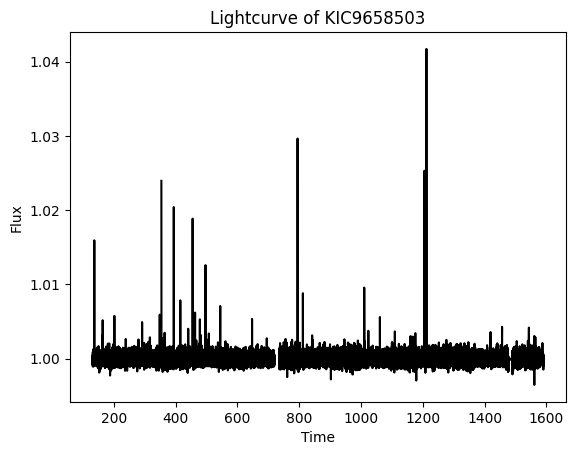

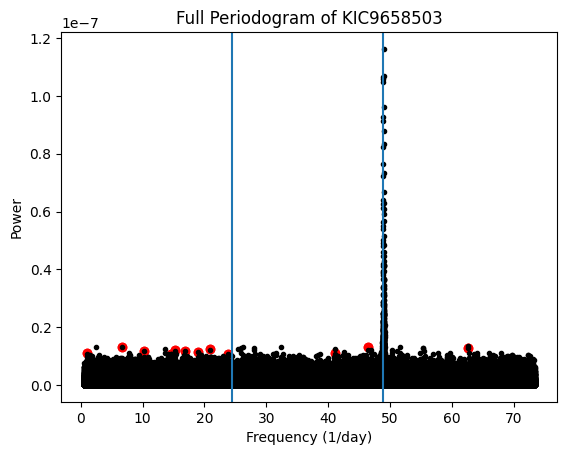

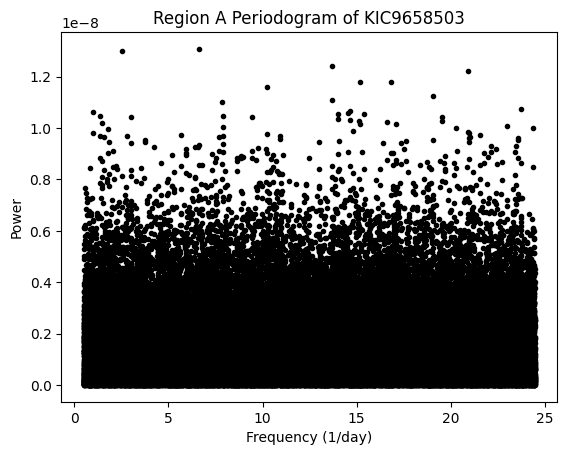

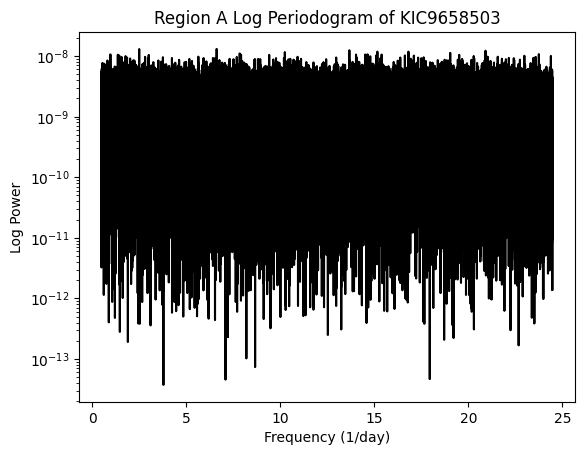

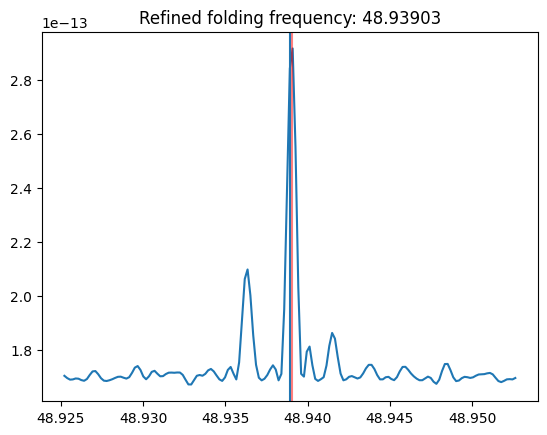

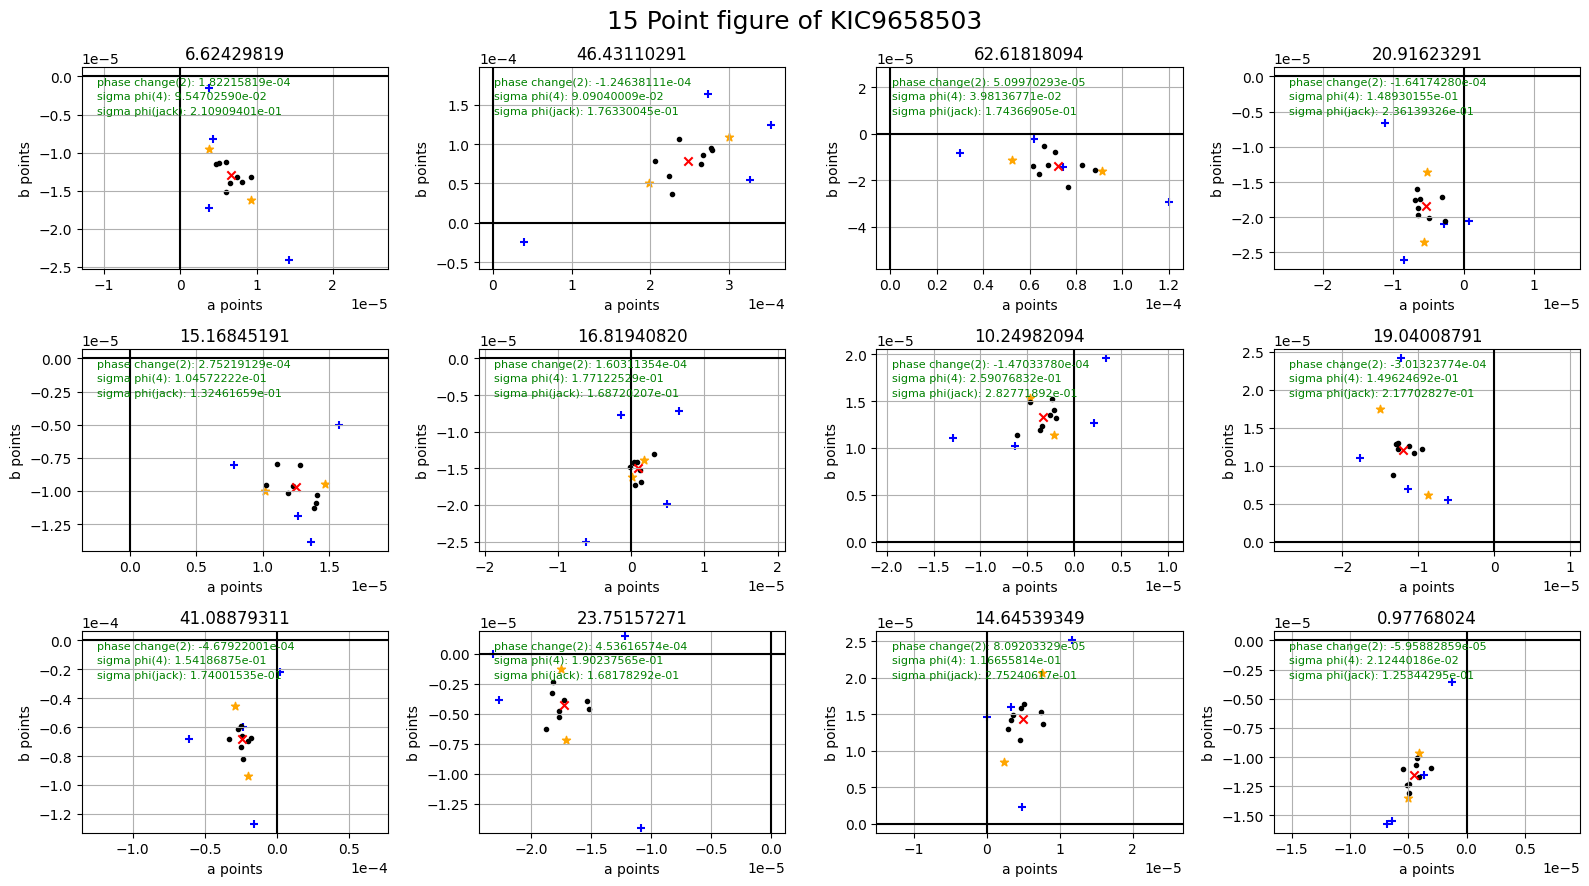

In [115]:
_, _, _, __, _, _, _ = star_search(9658503, True, True)

In [89]:
#KIC 1573876 rando star
#8057661
kicID = 'KIC5202905'
#009658503
lc, delta_f, sampling_time, exptime157 = nana.star(kicID)
# print("delta_f:", delta_f)
# print("sampling_time:", sampling_time)
#if lc is None:
    #return 
f_max = (3 / (2*sampling_time))
df = delta_f/3
f_min = 0.5 #magic days
t_fit157, flux_fit157, weight_fit157 = nana.mask_vals(lc)
freq_full, power_full = nana.pg_full(f_min, f_max, df, lc)
freq_mini, power_mini = nana.pg_mini(f_min, f_max, df, lc)
indices = nana.get_filtered_peaks(3000, freq_mini, power_mini)
indices = np.array([44295, None, 53232, None, 69140])
refined_freq, refined_power, second_derivatives = nana.refine_peaks(freq_mini, power_mini, indices)




# plt.plot(freq_mini, power_mini, 'g-')
# plt.scatter(freq_mini[indices], power_mini[indices], marker = 'o')
# #plt.title(f"{kicID}: random star")
# plt.show()

#plt.savefig(f"{kicID}_powermini.png")


#



fc = nana.folding_freq(delta_f, freq_full, power_full, sampling_time, False)
regions, final_freqs157, chi2s = region_and_freqtest(indices, fc, df, freq_mini, power_mini, t_fit157, flux_fit157, weight_fit157, exptime157)

# plt.plot(freq_full, power_full, 'g.')
# plt.scatter(final_freqs157, refined_power, color = 'red', marker = 'o')
# plt.title(f"{kicID}: random star")
# plt.show()


# # plt.plot(freq_full, power_full, 'k.')
# # plt.scatter(final_freqs157, refined_power, color = 'red', marker = 'o')
# # plt.title(f"{kicID}: random star")
# # plt.savefig(f"{kicID}_powerfull.png")
# # plt.show()


a_early, a_late, b_early, b_late = check_coherence(t_fit157, flux_fit157, weight_fit157, final_freqs157, exptime157)
rate_of_phase157, rate_of_amp = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit157)
nulls = nana.null_chi_squared(flux_fit157, weight_fit157)
delta_chi2s = [None if c is None else nulls - c for c in chi2s]

all, half, quartiles, eighths = nana.coherence_all(t_fit157, flux_fit157, weight_fit157, final_freqs157, exptime157)
amp_change, phase_change, sigma_lnA, sigma_phi4, sigma_phij = nana.sampling_stats(all, quartiles, eighths)

sharpnesses = nana.sharpness(second_derivatives, refined_power)
# print(final_freqs157)


#takes in kic creturns table or none, and concatenate outputs
#kic works as integer!!(not float), just use formatting commands to make string
#make google calender invite!!!!, put zoom llink into invite (you have the link)
#email phi m radio team, go over that speicfic kic (binary companions)
#, half, quartiles, eighths)






this is amp_change [[0.1819713019491257 0.09983492887430465 -0.13063413015133116
  -0.15051925614944922]
 [None None None None]
 [0.16183816029169049 0.12637620498540675 -0.014189443445856636
  -0.27487434501918345]
 [None None None None]
 [0.0814075248659264 0.03959993490458866 -0.02319418835217993
  -0.09774476314264363]]
this is phase_change [[-0.11293309958432551 0.09168064257714616 0.12616438610000813
  -0.10721278617845917]
 [None None None None]
 [0.05353593123818875 -0.03658483877765031 -0.060478429186348076
  0.04423112257629053]
 [None None None None]
 [0.018404067799564345 -0.012966935585981783 -0.018539761892456652
  0.01331956625439421]]
this is sigma_lnA [np.float64(0.07193829395242833) None np.float64(0.08584862446777348) None
 np.float64(0.03380768130578093)]
this is sigma_phi4 [np.float64(0.055097220350271266) None np.float64(0.024772185716966034)
 None np.float64(0.008015550301976102)]
this is sigma_phij [np.float64(0.04676346396841073) None np.float64(0.0223910156723

In [73]:
def region_and_freqtest(indices, folding_freq, f_min, unrefined_freq, unrefined_power, t_fit, flux_fit, weight_fit, T):

    """
    ## Inputs:
    `indices`: array of peak indices
    `folding_freq`: folding frequency   
    `df`: frequency resolution
    `unrefined_freq`: array of frequency values  
    `unrefined_power`: power spectrum values corresponding to `unrefined_freq`  
    `t_fit`: time values used for model fitting  
    `flux_fit`: observed signal (e.g., flux)  
    `weight_fit`: weights for fitting  
    `T`: exposure time in days

    ## Outputs:
    Three NumPy arrays:
    - `regions`: array of region labels (`"A"`, `"B"`, `"C"`)
    - `best_freqs`: refined frequency values for each peak
    - `best_chi2s`: corresponding chi-squared values

    ## Bugs:
    - Assumes `refine_peaks` succeeds for all given indices
    - No handling if `fine_freqsX` are empty or out of bounds
    """
    valid_locs = [j for j, val in enumerate(indices) if val is not None]
    valid_indices = [indices[j] for j in valid_locs]
    
    N = len(indices)
    regions = np.full(N, None)
    best_freqs = np.full(N, None)
    best_chi2s = np.full(N, None)

    fas, _, _ = nana.refine_peaks(unrefined_freq, unrefined_power, valid_indices)
    
    A, B, C = fas, folding_freq - fas, folding_freq + fas

    

    for i, loc in enumerate(valid_locs):
        fine_freqsA = np.arange(A[i] - 5 * f_min, A[i] + 5 * f_min, 0.2 * f_min)
        chi2_fineA = np.array([nana.integral_chi_squared(2 * np.pi * f, t_fit, flux_fit, weight_fit, T) for f in fine_freqsA])
        best_freqA, best_chi2A = nana.find_min_and_refine(fine_freqsA, chi2_fineA)

        fine_freqsB = np.arange(B[i] - 5 * f_min, B[i] + 5 * f_min, 0.2 * f_min)
        chi2_fineB = np.array([nana.integral_chi_squared(2 * np.pi * f, t_fit, flux_fit, weight_fit, T) for f in fine_freqsB])
        best_freqB, best_chi2B = nana.find_min_and_refine(fine_freqsB, chi2_fineB)

        fine_freqsC = np.arange(C[i] - 5 * f_min, C[i] + 5 * f_min, 0.2 * f_min)
        chi2_fineC = np.array([nana.integral_chi_squared(2 * np.pi * f, t_fit, flux_fit, weight_fit, T) for f in fine_freqsC])
        best_freqC, best_chi2C = nana.find_min_and_refine(fine_freqsC, chi2_fineC)

        if best_chi2A <= best_chi2B and best_chi2A <= best_chi2C:
            regions[loc] = "A"
            best_freqs[loc] = best_freqA
            best_chi2s[loc] = best_chi2A
        elif best_chi2B < best_chi2A and best_chi2B < best_chi2C:
            regions[loc] = "B"
            best_freqs[loc] = best_freqB
            best_chi2s[loc] = best_chi2B
        else:
            regions[loc] = "C"
            best_freqs[loc] = best_freqC
            best_chi2s[loc] = best_chi2C

    return regions, best_freqs, best_chi2s


In [106]:
def check_coherence(ts, ys, weights, final_freq, T):
    """
    ## Inputs:
    `ts`: numpy array of time values  
    `ys`: numpy array of signal values (flux)  
    `weights`: numpy array of weights  
    `final_freq`: numpy array of refined frequencies 
    `T`: exposure time 

    ## Outputs:
    Four NumPy arrays:
    - `a_early`: sine amplitudes before the median time  
    - `a_late`: sine amplitudes after the median time  
    - `b_early`: cosine amplitudes before the median time  
    - `b_late`: cosine amplitudes after the median time

    ## Bugs:
    - Assumes `ts`, `ys`, and `weights` are NumPy arrays of the same length
    - Assumes design matrix and fit always succeed on each slice
    - Assumes data can be cleanly split at the median time
    """
    N = len(final_freq)
    a_early, a_late, b_early, b_late = (np.full(N, None) for _ in range(4))

    ts_median = np.median(ts)
    I_early = ts < ts_median
    I_late  = ts > ts_median

    for inx, f in enumerate(final_freq):

        if f is None:
            continue
        
        om = 2 * np.pi * f

        A_early = integral_design_matrix(ts[I_early], om, T)
        pars_early, _ = weighted_least_squares_new(A_early, ys[I_early], weights[I_early])
        a_early[inx] = pars_early[1]
        b_early[inx] = pars_early[2]

        A_late = integral_design_matrix(ts[I_late], om, T)
        pars_late, _ = weighted_least_squares_new(A_late, ys[I_late], weights[I_late])
        a_late[inx] = pars_late[1]
        b_late[inx] = pars_late[2]

    return a_early, a_late, b_early, b_late

In [103]:
os.getcwd()

'/Users/nana/venv/hoggnation/oscillator_catalog'